# Jamboree Education - Linear Regression

**About the Dataset**  
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.  
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Column Profiling:
* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

**Problem Statement:**
Analyse the predictor variables to draw insights about the importance of various factors in prediction of chances of graduate admission and how they are related to each other.


# Import Libraries & Download Dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)




In [2]:
df = pd.read_csv(f'D:\Kartikeya\Scaler\Jamboree Education - Linear Regression\\Jamboree_Admission.csv')

**Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.**

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


There are no missing values present in the dataset. 
**Droping the unique row Identifier. This step is important as I don’t want my model to build some understanding based on row numbers.**

In [6]:
df.drop(['Serial No.'],axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Use Non-graphical and graphical analysis for getting inferences about variables. This can be done by checking the distribution of variables of graduate applicants.**
Exploratory data analysis is generally cross-classified in two ways. First, each method is either non-graphical or graphical. And second, each method is either univariate or multivariate (usually just bivariate). Non-graphical methods generally involve calculation of summary statistics, while graphical methods obviously summarize the data in a diagrammatic or pictorial way. Univariate methods look at one variable (data column) at a time, while multivariate methods look at two or more variables at a time to explore relationships. Usually our multivariate EDA will be bivariate (looking at exactly two variables), but occasionally it will involve three or more variables. It is almost always a good idea to perform univariate EDA on each of the components of a multivariate EDA before performing the multivariate EDA.

In [7]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


**Univariate Non-graphical EDA Tabulation of Categorical Data (Tabulation of the Frequency of Each Category)**

A simple univariate non-graphical EDA method for categorical variables is to build a table containing the count and the fraction (or frequency) of data of each category.italicised text

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Characteristics of Quantitative Data:** Central Tendency, Spread, Shape of the Distribution (Skewness, Kurtosis) These characteristics can express the central tendency of the data (arithmetic mean, median, mode), its spread (variance, standard deviation, interquartile range, maximum and minimum value) or some features of its distribution (skewness, kurtosis).Note that these characteristics can only be used for quantitative variables (not categorical).

The DataFrame class of pandas has a method skew() that computes the skewness of the data present in a given axis of the DataFrame object.

Skewness is computed for each row or each column of the data present in the DataFrame object.

Important Notes:

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

· Kurtosis is one of the two measures that quantify shape of a distribution. kutosis determine the volume of the outlier

· Kurtosis describes the peakedness of the distribution.

· If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.

· A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.

· A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

· Kurtosis is sometimes reported as “excess kurtosis.” Excess kurtosis is determined by subtracting 3 from the kurtosis. This makes the normal distribution kurtosis equal 0. 

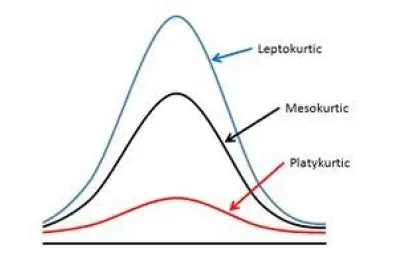

In [9]:
mean=df.mean(axis=0)
median=df.median(axis=0)
mode=pd.DataFrame(df.mode(axis=0),columns=df.columns)
print(mean,'\n*********** mean:*************\n',median,'\n*********** mode:*************\n')
mode.head()
std=df.describe().loc['std']
Q1=df.describe().loc['25%']
Q3=df.describe().loc['75%']
IQR=Q3-Q1
max=Q1=df.describe().loc['max']
min=Q1=df.describe().loc['min']
print(std,'\n*********** IQR:*************\n',IQR,'\n*********** max:*************\n',max,'\n*********** min:*************\n',min)
skew=df.skew(axis=1)
kurt=pd.DataFrame(df.kurt(axis=1),columns=["kurt"])
kurt.head()
#print('\n*********** skew:*************\n',skew,'\n*********** kurt:*************\n',kurt)

GRE Score            316.47200
TOEFL Score          107.19200
University Rating      3.11400
SOP                    3.37400
LOR                    3.48400
CGPA                   8.57644
Research               0.56000
Chance of Admit        0.72174
dtype: float64 
*********** mean:*************
 GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.56
Research               1.00
Chance of Admit        0.72
dtype: float64 
*********** mode:*************

GRE Score            11.295148
TOEFL Score           6.081868
University Rating     1.143512
SOP                   0.991004
LOR                   0.925450
CGPA                  0.604813
Research              0.496884
Chance of Admit       0.141140
Name: std, dtype: float64 
*********** IQR:*************
 GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR       

,kurt
0,5.342020
1,5.607376
2,5.608048
3,5.439713
4,5.605129


Multivariate Non-graphical EDA Cross-Tabulation Cross-tabulation represents the basic bivariate non-graphical EDA technique. It is an extension of tabulation that works for categorical data and quantitative data with only a few variables. For two variables, build a two-way table with column headings matching the levels of one variable and row headings matching the levels of the other variable, then fill in the counts of all subjects that share a pair of levels. The two variables may be both exposure, both outcome variables, or one of each.

Covariance and Correlation

Covariance and correlation measure the degree of the relationship between two random variables and express how much they change together

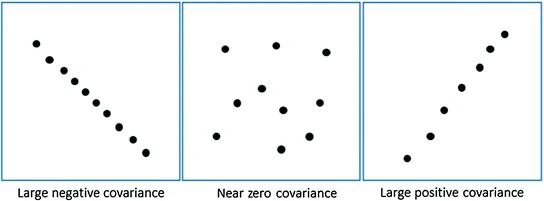

In [10]:
df.cov()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,127.580377,56.825026,8.206605,6.867206,5.484521,5.641944,3.162004,1.291862
TOEFL Score,56.825026,36.989114,4.519150,3.883960,3.048168,2.981607,1.411303,0.680046
University Rating,8.206605,4.519150,1.307619,0.825014,0.644112,0.487761,0.242645,0.111384
SOP,6.867206,3.883960,0.825014,0.982088,0.608701,0.426845,0.200962,0.095691
LOR,5.484521,3.048168,0.644112,0.608701,0.856457,0.356807,0.171303,0.084296
CGPA,5.641944,2.981607,0.487761,0.426845,0.356807,0.365799,0.150655,0.075326
Research,3.162004,1.411303,0.242645,0.200962,0.171303,0.150655,0.246894,0.038282
Chance of Admit,1.291862,0.680046,0.111384,0.095691,0.084296,0.075326,0.038282,0.019921


In [11]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


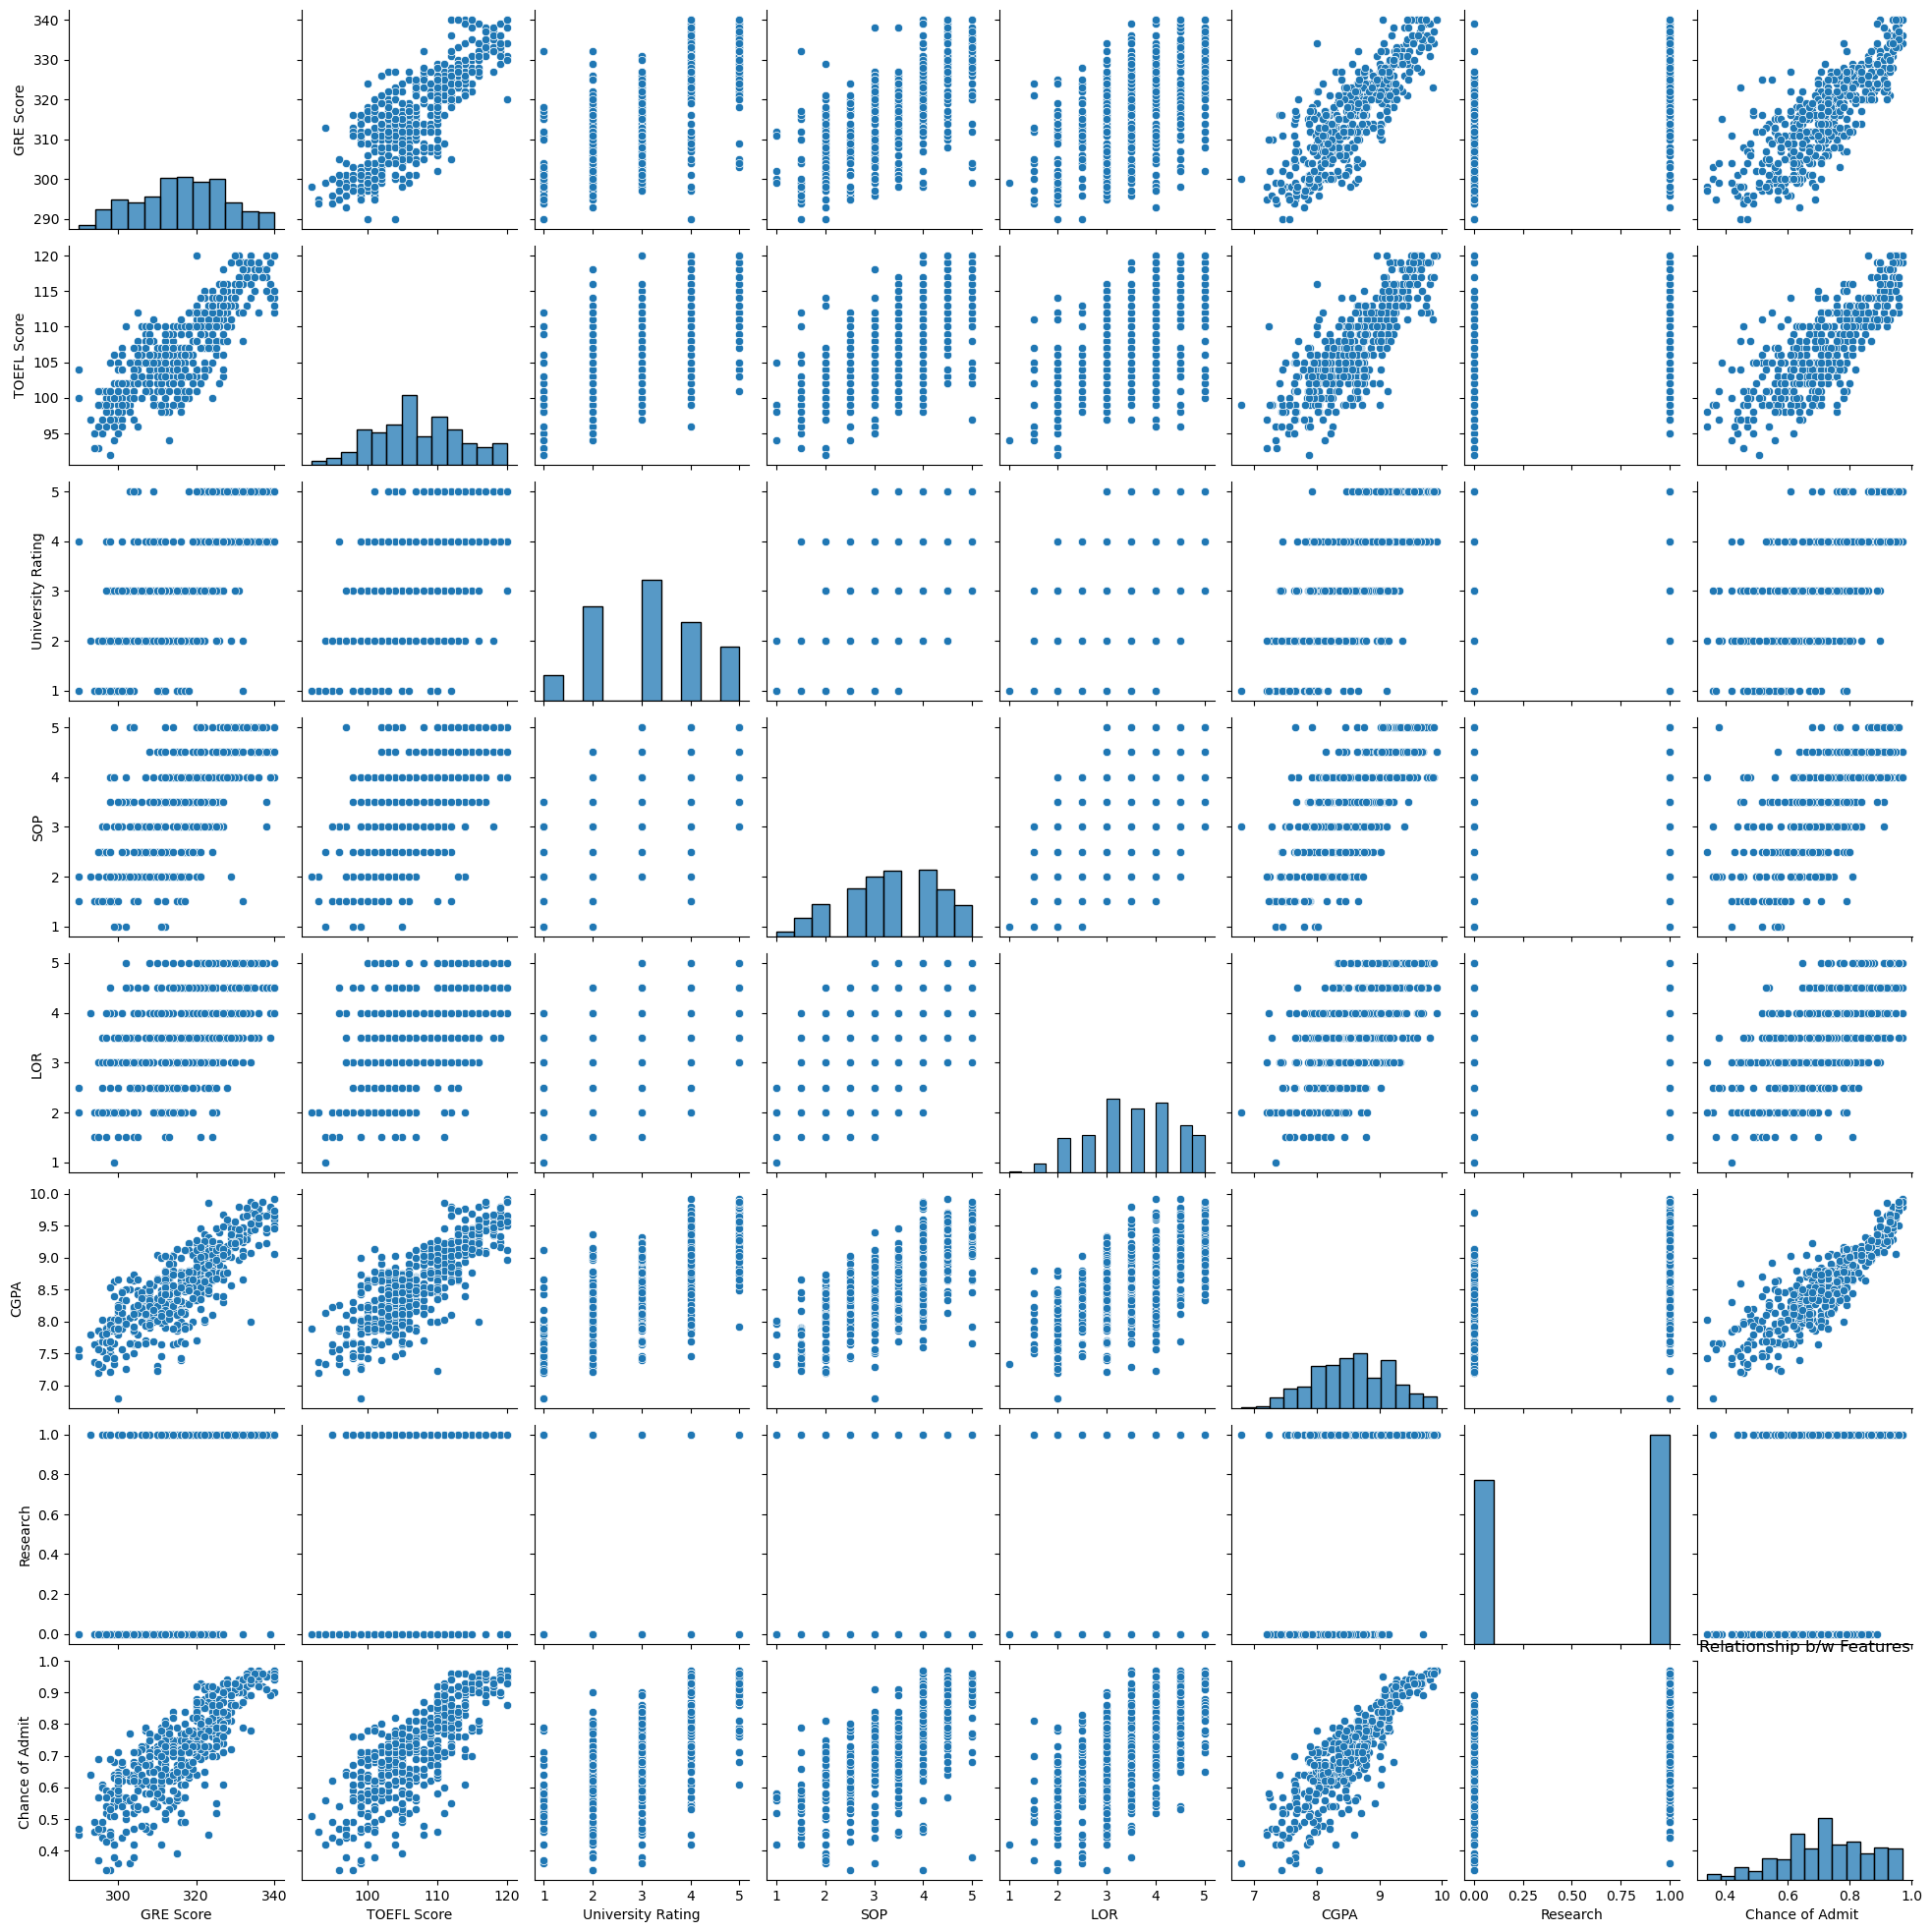

In [12]:
sns.pairplot(df)
plt.title('Relationship b/w Features')
plt.show();

* Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit
* While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
* We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

In [13]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [14]:
df[['University Rating', 'SOP', 'LOR']] = df[['University Rating', 'SOP', 'LOR']].astype('category')
df['Research'] = df['Research'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    bool    
 7   Chance of Admit    500 non-null    float64 
dtypes: bool(1), category(3), float64(2), int64(2)
memory usage: 18.6 KB


**Heatmap to analyse the correlation between numerical features and Chance of Admit**

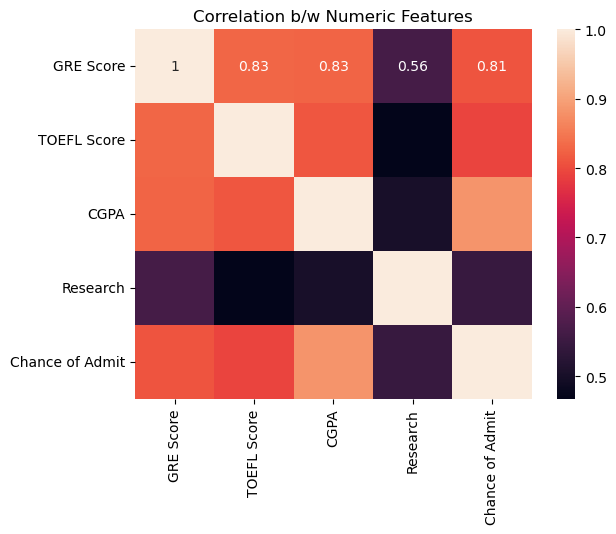

In [15]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)
plt.title('Correlation b/w Numeric Features')
plt.show();

<Axes: >

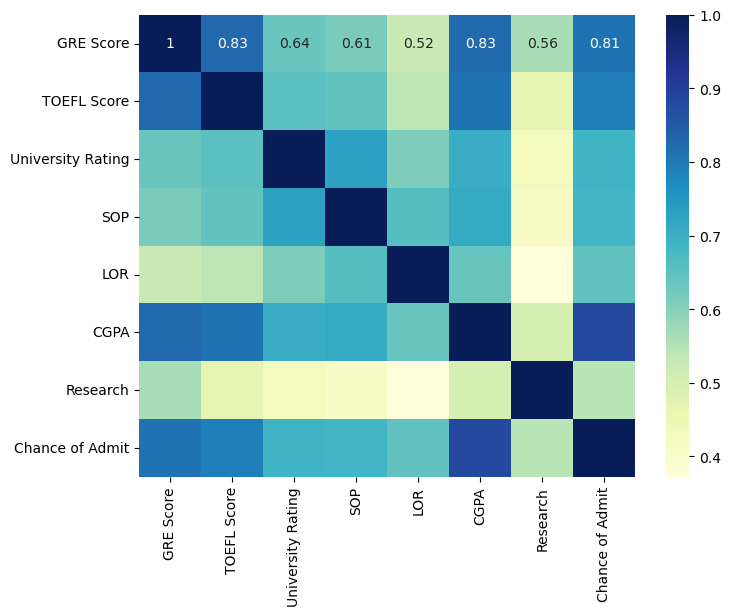

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

* Confirming the inferences from pairplot, the correlation matrix also shows that **exam scores (CGPA/GRE/TOEFL)** have a strong positive correlation with chance of admit
* Infact, they are also highly correlated amongst themselves

2.3 Graphical EDA Univariate Graphical EDA

Histograms

Histograms are among the most useful EDA techniques, and allow you to gain insight into your data, including distribution, central tendency, spread, modality and outliers. Boxplots

Boxplots are interesting for representing information about the central tendency, symmetry, skew and outliers, but they can hide some aspects of the data such as multimodality. Boxplots are an excellent EDA technique because they rely on robust statistics like median and IQR. Side-by-Side Boxplots

Representing several boxplots side by side allows easy comparison of the characteristics of several groups of data

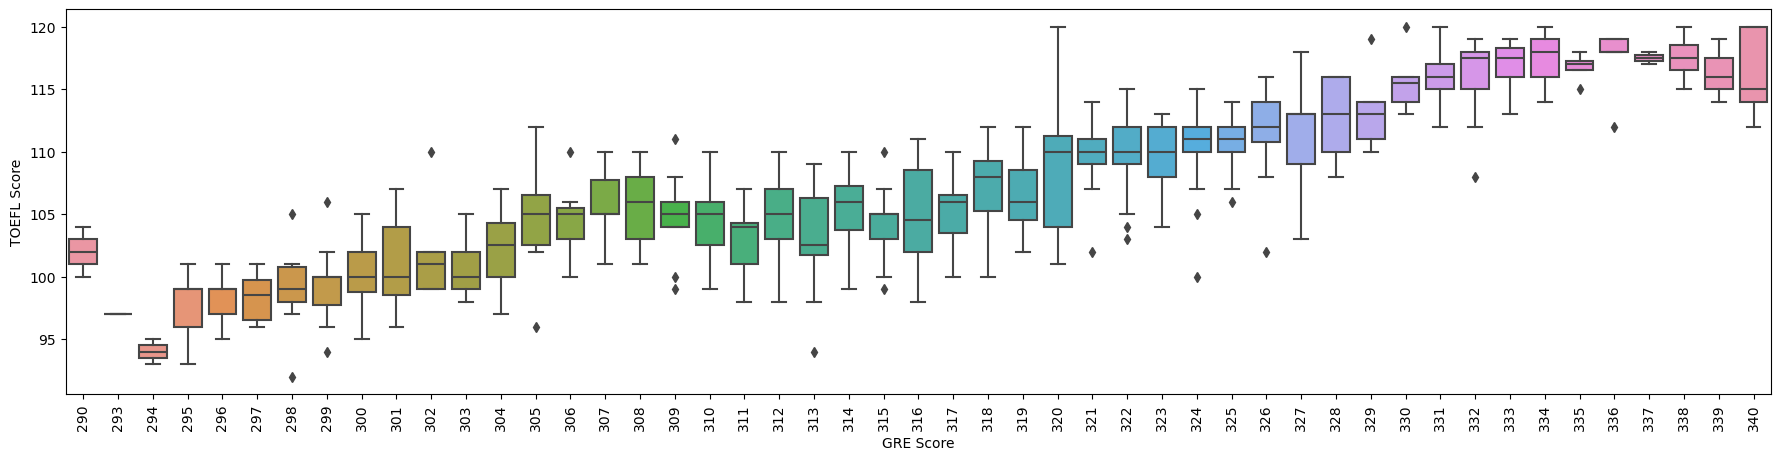

In [17]:
plt.figure(figsize=(22,5))
sns.boxplot(x='GRE Score',y='TOEFL Score',data=df)
plt.xticks(rotation=90);
plt.show()

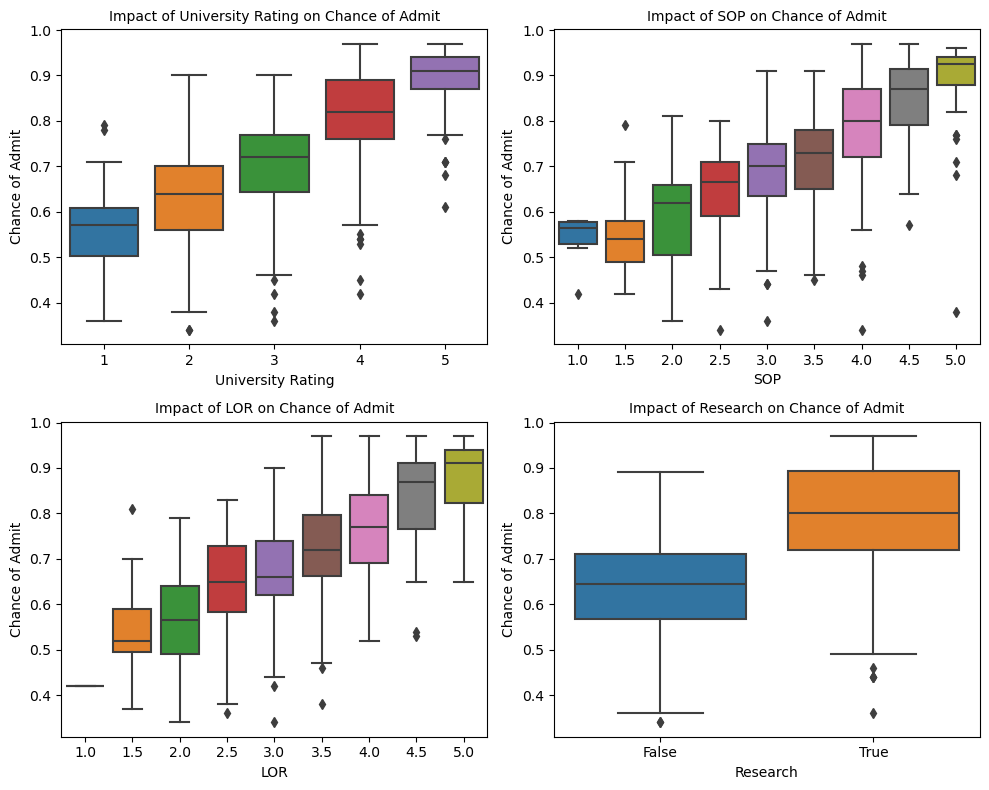

In [18]:
# Boxplots to analyse the relationship between categorical variables and Chance of Admit

cat_cols = df.select_dtypes(include=['bool','category']).columns.tolist()
plt.figure(figsize=(10,8))
i=1
for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.boxplot(data = df, x=col, y='Chance of Admit')
  plt.title(f"Impact of {col} on Chance of Admit", fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Chance of Admit')
  i+=1

plt.tight_layout()
plt.show();

* As seen in the pairplot earlier, the categorical variables such as university ranking, research, quality of SOP and LOR also increase the chances of admit.

**Distribution of continuous numerical features**

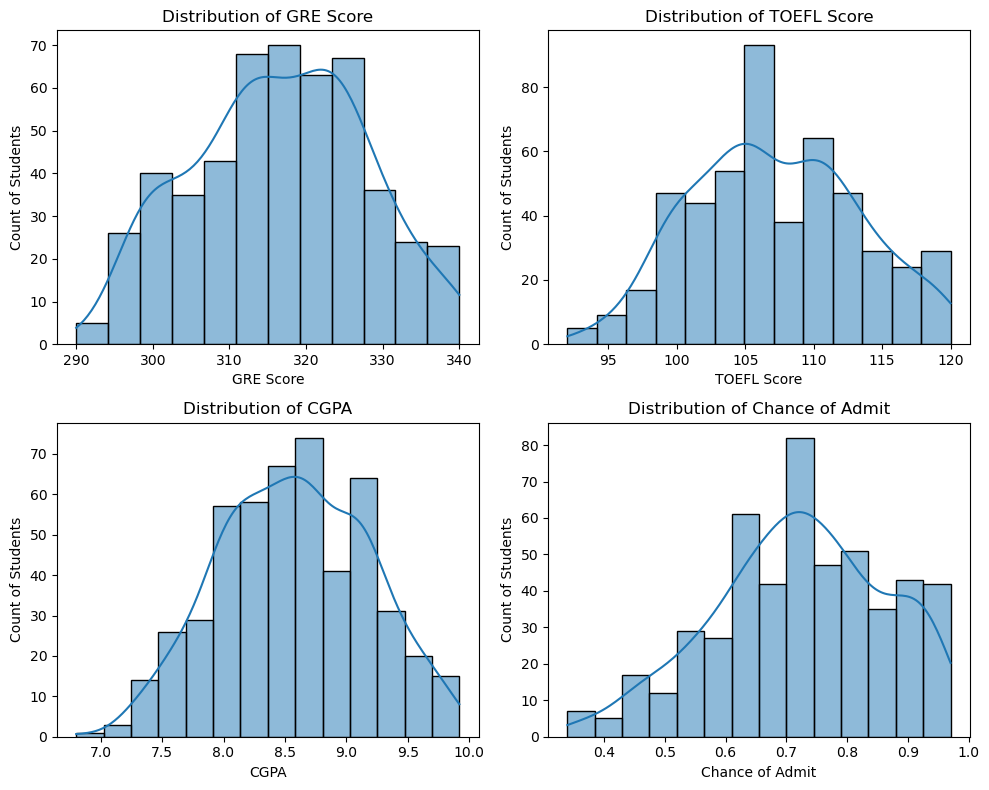

In [19]:
numeric_cols = df.select_dtypes(include=['float','int']).columns.tolist()

plt.figure(figsize=(10,8))
i=1
for col in numeric_cols:
  ax=plt.subplot(2,2,i)
  sns.histplot(data=df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i += 1

plt.tight_layout()
plt.show();

We can see the range of all the numerical attributes:
* GRE scores are between 290 and 340, with maximum students scoring in the range 310-330
* TOEFL scores are between 90 and 120, with maximum students scoring around 105
* CGPA ranges between 7 and 10, with maximum students scoring around 8.5
* Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%

**Distribution of categorical variables**

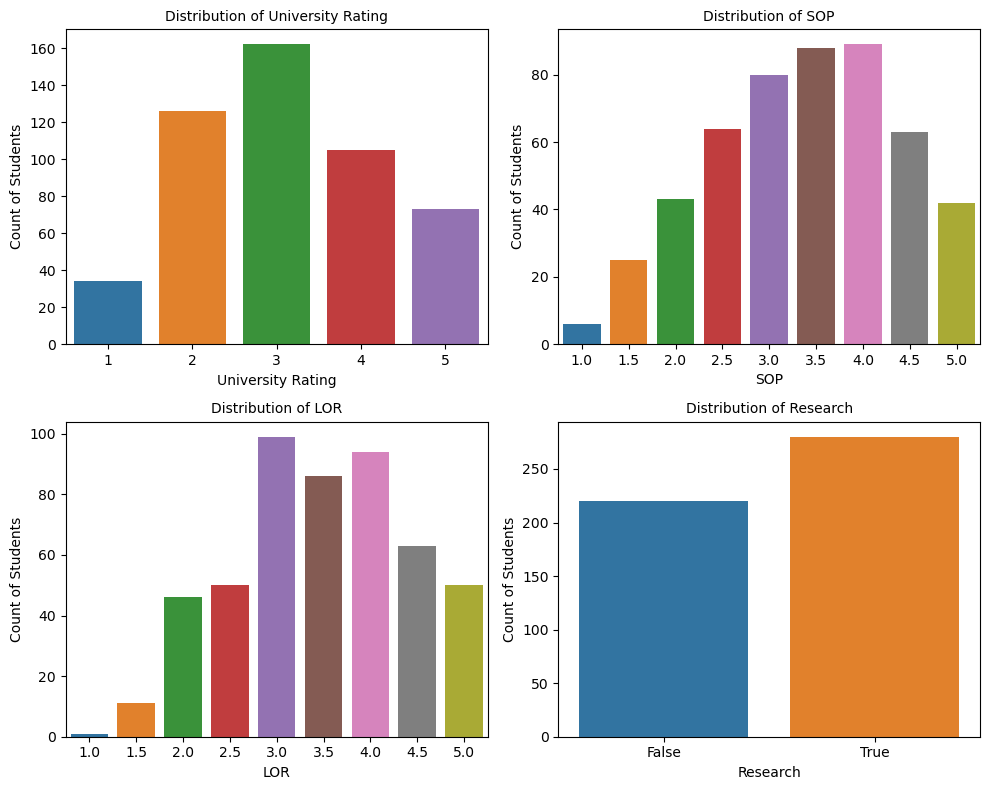

In [20]:
plt.figure(figsize=(10,8))
i=1

for col in cat_cols:
  ax = plt.subplot(2,2,i)
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}', fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i+=1

plt.tight_layout()
plt.show();

It can be observed that the most frequent value of categorical features is as following:
* University Rating: 3
* SOP: 3.5 & 4
* LOR: 3
* Research: True

# Data Preprocessing


## Missing Values/Outliers/Duplicates Check

* Check for missing values in all columns


In [21]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in the dataset

**Check for outliers in numerical columns**

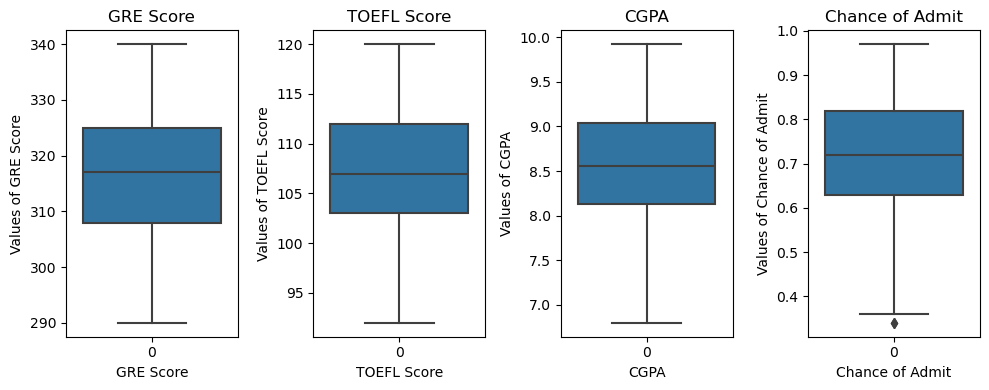

In [22]:
plt.figure(figsize=(10,4))
i=1

for col in numeric_cols:
  ax = plt.subplot(1,4,i)
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel(f'Values of {col}')
  i+=1

plt.tight_layout()
plt.show()

It can be observed that there are no outliers in the numeric columns (all the observations are within the whiskers which represent the mimimum and maximum of the range of values)

**Check for Duplicate rows**

In [23]:
df[df.duplicated()].shape

(0, 8)

There are no duplicate rows in the dataset

## Train-Test Split

In [24]:
numeric_cols.remove('Chance of Admit')

**Separate predictor and target variables**

In [25]:
x = df[numeric_cols + cat_cols]
y = df[['Chance of Admit']]

In [26]:
x.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
0,337,118,9.65,4,4.5,4.5,True
1,324,107,8.87,4,4.0,4.5,True
2,316,104,8.00,3,3.0,3.5,True
3,322,110,8.67,3,3.5,2.5,True
4,314,103,8.21,2,2.0,3.0,False


In [27]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


**Split the data into training and test data**

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                     random_state=42)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400, 1)
Shape of y_test: (100, 1)


## Label Encoding & Standardisation

**Initialize a dictionary to store the label encoders**

In [29]:
label_encoders = {}

**Loop through each categorical column and initialize the label encoder**

In [30]:
for col in cat_cols:
    label_encoders[col] = LabelEncoder()

**Fitting encoders to the respective columns**

In [31]:
for col in cat_cols:
  label_encoders[col].fit(x[col])

**Transforming categorical columns in the train and test**

In [32]:
for col in cat_cols:
  x_train[col] = label_encoders[col].transform(x_train[col])
  x_test[col] = label_encoders[col].transform(x_test[col])

In [33]:
x_cat_encoded = pd.concat([x_train, x_test])
x_cat_encoded.head(10)

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
249,321,111,8.83,2,5,6,1
433,316,111,8.54,3,6,8,0
19,303,102,8.50,2,5,4,0
322,314,107,8.27,1,3,6,0
332,308,106,8.21,2,5,3,1
56,316,102,7.40,2,2,4,0
301,319,108,8.76,1,3,4,0
229,324,111,9.01,3,4,4,1
331,311,105,8.12,1,4,2,1
132,309,105,8.56,4,5,5,0


**Initialising object of class MinMaxScaler() for Standardisation**

In [34]:
scaler_x = MinMaxScaler()

**Fitting scaler_x to the training data**

In [35]:
scaler_x.fit(x_cat_encoded)

MinMaxScaler()

In [36]:
all_cols = x_train.columns

**Transforming numeric columns of x_train and x_test**

In [37]:
x_train[all_cols]=scaler_x.transform(x_train[all_cols])
x_test[all_cols]=scaler_x.transform(x_test[all_cols])

In [38]:
x_test.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
361,0.88,0.857143,0.878205,0.75,0.750,0.625,1.0
73,0.48,0.571429,0.717949,0.75,0.875,0.750,1.0
374,0.50,0.464286,0.272436,0.25,0.250,0.375,0.0
155,0.44,0.607143,0.605769,0.50,0.500,0.500,0.0
104,0.72,0.714286,0.721154,0.50,0.625,0.500,1.0


## Base Model: Linear Regression

**Initialising object of Class LinearRegression()**

In [39]:
model_lr = LinearRegression()

**Fitting the model to the training data**

In [40]:
model_lr.fit(x_train, y_train)

LinearRegression()

**Predicting values for the training and test data**

In [41]:
y_pred_train = model_lr.predict(x_train)
y_pred_test = model_lr.predict(x_test)

**Evaluating the model using multiple loss functions**

In [42]:
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

**Metrics for training data**

In [43]:
model_evaluation(y_train.values, y_pred_train, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


**Metrics for test data**

In [44]:
model_evaluation(y_test.values, y_pred_test, model_lr)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Since there is no difference in the loss scores of training and test data, we can conclude that there is no overfitting of the model

* Mean Absolute Error of 0.04 shows that on an average, the absolute difference between the actual and predicted values of chance of admit is 4%
* Root Mean Square Error of 0.06 means that on an average, the root of squared difference between the actual and predicted values is 6%
* R2 Score of 0.82 means that our model captures 82% variance in the data
* Adjusted R2 is an extension of R2 which shows how the number of features used changes the accuracy of the prediction

**Model Coefficients**

In [45]:
for feature,weight in zip(x_train.columns, model_lr.coef_[0]):
  print(f"Weight of {feature}: {np.round(weight,2)}")

Weight of GRE Score: 0.12
Weight of TOEFL Score: 0.08
Weight of CGPA: 0.35
Weight of University Rating: 0.01
Weight of SOP: 0.01
Weight of LOR: 0.07
Weight of Research: 0.02


**Bias Term of the Model**

In [46]:
model_lr.intercept_

array([0.34696506])

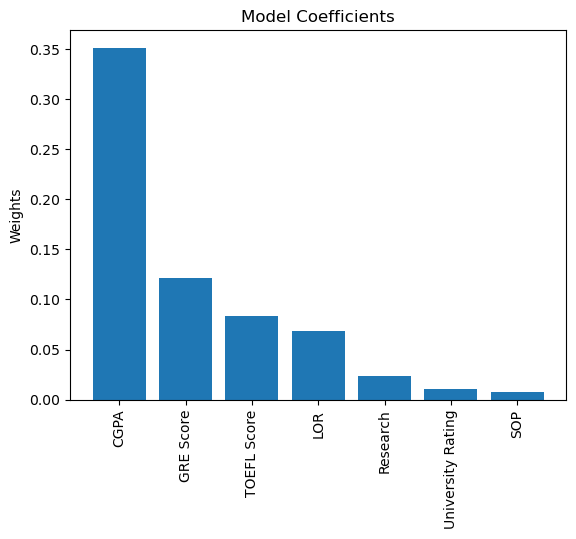

In [47]:
model_weights=list(zip(x_train.columns, model_lr.coef_[0]))
model_weights.sort(key=lambda x:x[1], reverse=True)

features = [i[0] for i in model_weights]
weights = [i[1] for i in model_weights]

plt.bar(x=features, height=weights)
plt.title('Model Coefficients')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.show();

* CGPA & GRE scores have the highest weight
* SOP, University rating, and research have the lowest weights

# Testing Assumptions of Linear Regression Model

## Multicolinearity Check

VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis. It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

The formula for VIF is as follows:

VIF(j) = 1 / (1 - R(j)^2)

Where:

j represents the jth predictor variable.
R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables.

In [48]:
vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif

,Variable,VIF
0,GRE Score,31.185925
1,TOEFL Score,26.753950
2,CGPA,41.732265
3,University Rating,10.837374
4,SOP,18.864173
5,LOR,14.657099
6,Research,3.366187


We see that almost all the variables (excluding research) have a very high level of colinearity. This was also observed from the correlation heatmap which showed strong positive correlation between GRE score, TOEFL score and CGPA.

## Mean of Residuals

The mean of residuals represents the average of residual values in a regression model. Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.  

The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average. However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.

In [49]:
residuals = y_test.values - y_pred_test
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.0054536237176613335


Since the mean of residuals is very close to 0, we can say that the model is unbiased

## Linearity of Variables

Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

When we talk about "no pattern in the residual plot" in the context of linearity, we are referring to the plot of the residuals (the differences between the observed and predicted values of the dependent variable) against the predicted values or the independent variables.

Ideally, in a linear regression model, the residuals should be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

1. Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.
2. U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.
3. Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.
4. Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.  

If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot.

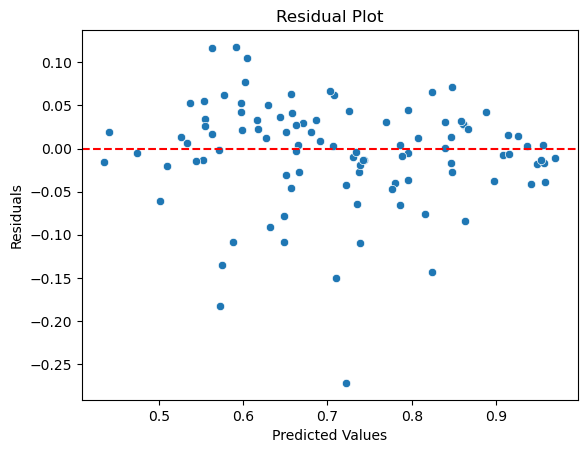

In [50]:
sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show();

* Since the residual plot shows no clear pattern or trend in residuals, we can conclude that linearity of variables exists

## Homoscedasticity

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

To test for homoscedasticity, there are several graphical and statistical methods that you can use:

1. Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

2. Scatterplot: If you have multiple independent variables, you can create scatter plots of the residuals against each independent variable separately. Again, look for any patterns or trends in the spread of the residuals.

3. Breusch-Pagan Test: This is a statistical test for homoscedasticity. It involves regressing the squared residuals on the independent variables and checking the significance of the resulting model. If the p-value is greater than a chosen significance level (e.g., 0.05), it suggests homoscedasticity. However, this test assumes that the errors follow a normal distribution.

4. Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity.

It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity. Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

**Scatterplot of residuals with each independent variable to check for Homoscedasticity**

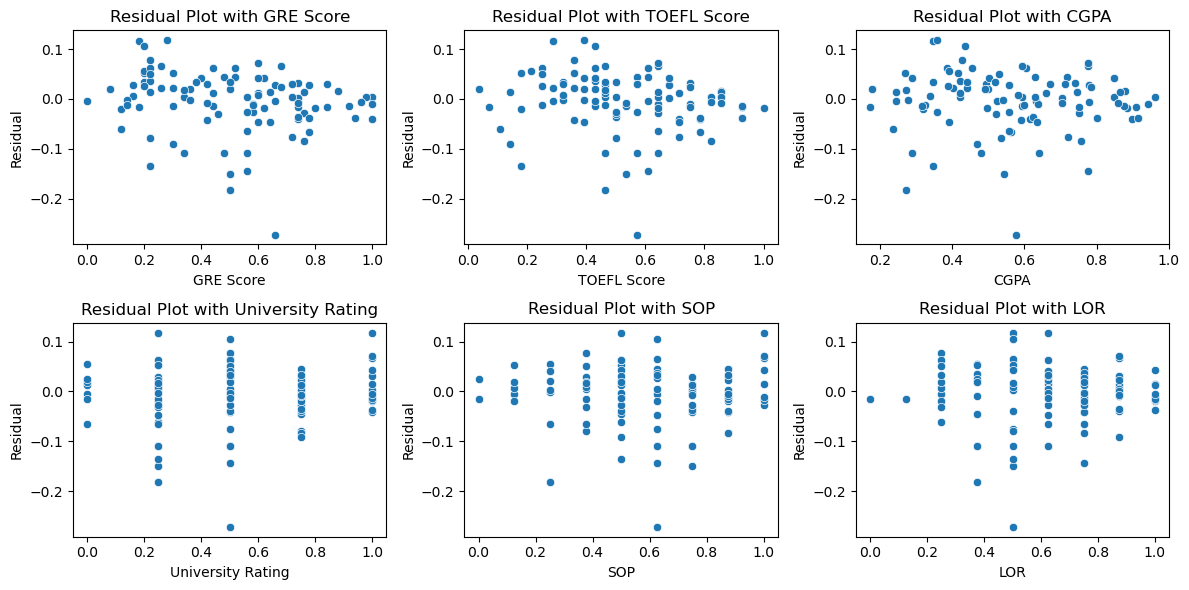

In [51]:
plt.figure(figsize=(12,6))
i=1
for col in x_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show();

* Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that homoscedasticity is met.

## Normality of Residuals

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, you can follow these steps:

1. Residual Histogram: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.

2. Q-Q Plot (Quantile-Quantile Plot): This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.

3. Shapiro-Wilk Test: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.

4. Skewness and Kurtosis: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

* Histogram of Residuals

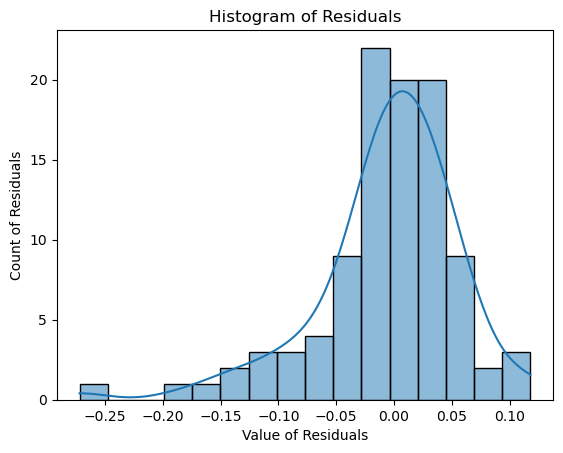

In [52]:
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

* The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution

**QQ-Plot of residuals**


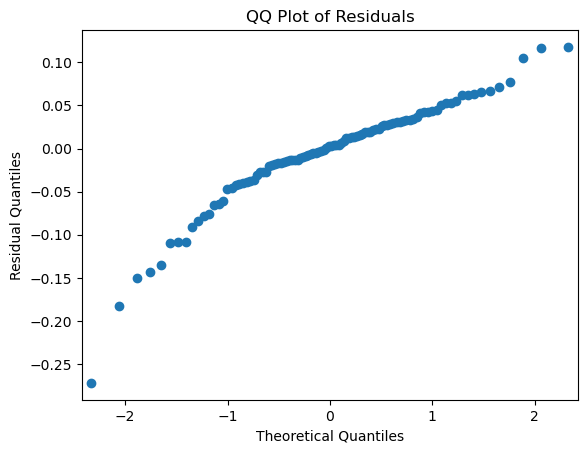

In [53]:
sm.qqplot(residuals.reshape((-1,)))
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show();

* The QQ plot shows that residuals are slightly deviating from the straight diagonal.

## Lasso and Ridge Regression

Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

**Ridge Regression:**
Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).

**Lasso Regression:**
Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.

The main differences between Ridge and Lasso regression are:

* Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
* Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

**Initialising instance of Ridge and Lasso classes**

In [54]:
model_ridge = Ridge()
model_lasso = Lasso()

**Fitting the models to training data**

In [55]:
model_ridge.fit(x_train, y_train)
model_lasso.fit(x_train, y_train)

Lasso()

**Predicting values for train and test data**

In [56]:
y_train_ridge = model_ridge.predict(x_train)
y_test_ridge = model_ridge.predict(x_test)

y_train_lasso = model_lasso.predict(x_train)
y_test_lasso = model_lasso.predict(x_test)

**Evaluating Model Performance**

In [57]:
print('Ridge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_ridge, model_ridge)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_ridge, model_ridge)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_train_lasso, model_lasso)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_test_lasso, model_lasso)

Ridge Regression Training Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


Ridge Regression Test Accuracy

MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


Lasso Regression Training Accuracy

MAE: 0.11
RMSE: 0.14
R2 Score: 0.0
Adjusted R2: -0.02


Lasso Regression Test Accuracy

MAE: 0.12
RMSE: 0.14
R2 Score: -0.01
Adjusted R2: -0.09


* While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data

# Identifying Best Model

**Actual v/s Predicted values for training data**

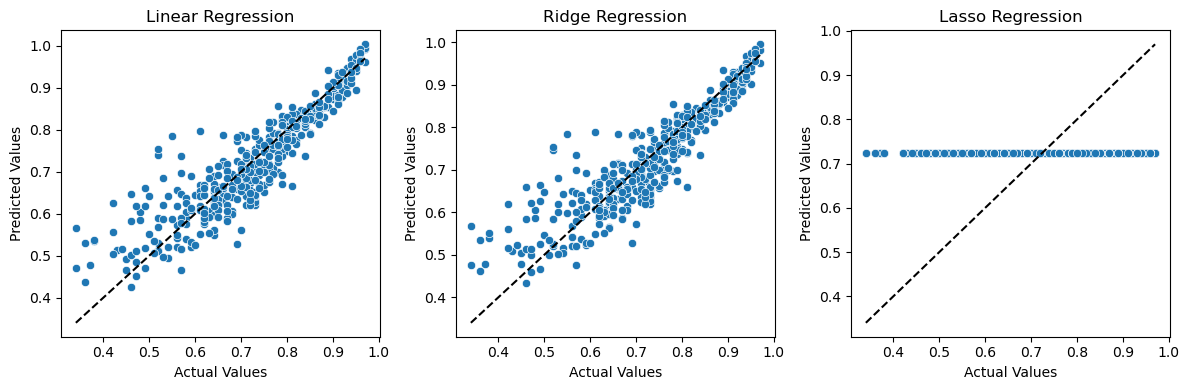

In [58]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_train_ridge.reshape((-1,)), y_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
plt.figure(figsize=(12,4))
i=1
for preds in predicted_values:
  ax = plt.subplot(1,3,i)
  sns.scatterplot(x=actual_values, y=preds)
  plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'k--')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(model[i-1])
  i+=1
plt.tight_layout()
plt.show();

* We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

* This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

# Insights & Recommendations

Insights:
* The distribution of target variable (chances of admit) is left-skewed
* Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admit. These variables are also highly correlated amongst themselves
* the categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chances of admit.
* From the  model coefficients (weights), we can conclude that CGPA is the most significant predictor variable while SOP/University Rating are the least significant
* Both Linear Regression and Ridge Regression models, which are our best models, have captured upto 82% of the variance in the target variable (chance of admit). Due to high colinearity among the predictor variables, it is difficult to achieve better results.
* Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression - mean of residuals is close to 0, linearity of variables, normality of residuals and homoscedasticity is established.

Recommendations:
* Since all the exam scores are highly correlated, it is recommended to add more independent features for better prediction.
* Examples of other independent variables could be work experience, internships, mock interview performance, extracurricular activities or diversity variables